<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 07** | Python: Programação Orientada a Objetos
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>from / import / as;</li>
  <li>Módulo;</li>
  <li>Pacote;</li>
  <li>Baixando pacotes.</li>
</ol>

---

# **Exercícios**

## 0\. Preparação do ambiente

Neste exercício vamos utilizar a base de dados de ações da bolsa de valores dos EUA, a Dow Jones. Os dados estão disponíveis para *download* neste [link](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index). Vamos utilizar o pacote `wget` para fazer o *download* dos dados.

 - Instalando o pacote `wget` na versão 3.2.

 - Fazendo o download dos dados no arquivo compactado `dados.zip`.

In [1]:
import wget

wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip')

'./dados.zip'

 - Descompactando os `dados` na pasta dados com o pacote nativo `zipfile`.

In [ ]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

Verifique a pasta dados criada, ela deve conter dois arquivos:

 - **dow_jones_index.data**: um arquivo com os dados;
 - **dow_jones_index.names**: um arquivo com a descrição completa dos dados.

É possível observar que o arquivo de dados é um arquivo separado por virgulas, o famoso `csv`. Vamos renomear o arquivo de dados para que ele tenha a extensão `csv` com o pacote nativo `os`.

- Renomeando o arquivo com o pacote nativo `os`.

In [ ]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

Pronto! Abra o arquivo e o Google Colab irá apresentar uma visualização bem legal dos dados.

---

## 1\. Pandas

Para processar os dados, vamos utilizar o pacote `pandas` na versão `1.1.5`. A documentação completa por ser encontrada neste [link](https://pandas.pydata.org/docs/)

In [ ]:
!pip3 install pandas==1.1.5

Vamos importar o pacote com o apelido (alias) `pd`.

In [ ]:
import pandas as pd

df = pd.read_csv('dow_jones_index.csv', delimiter=';', on_bad_lines="skip")



Estamos prontos para ler o arquivo.

In [99]:
import pandas as pd

df = pd.read_csv('dow_jones_index.csv', on_bad_lines='skip')



O pandas trabalha com o conceito de dataframe, uma estrutura de dados com muitos métodos e atributos que aceleram o processamento de dados. Alguns exemplos:

 - Visualizando as `n` primeiras linhas:

In [89]:
df.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


 - Visualizando o nome das colunas:

In [101]:
df.columns.to_list()

['1. Title']

 - Verificando o número de linhas e colunas.

In [102]:
linhas, colunas = df.shape
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

Número de linhas: 77
Número de colunas: 1


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações do McDonalds, listado na Dow Jones como MCD:

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `MCD`.

In [103]:
df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace
df = df.rename(columns={'Stock': 'stock'})  # Rename if needed


 - Selecionando apenas as colunas de data e valores de ações.

In [106]:
import pandas as pd
df_mcd = pd.read_csv('dow_jones_index.data', on_bad_lines='skip')



Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [107]:
df_mcd.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


In [108]:
df_mcd.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.


In [110]:
for col in ['open', 'high', 'low', 'close']:
    if col in df_mcd.columns:
        df_mcd[col] = df_mcd[col].apply(lambda x: float(x.replace('$', '')) if isinstance(x, str) else x)
    else:
        print(f"Column '{col}' not found in DataFrame.")


Verifique novamente os dados e seus tipos.

In [111]:
df_mcd.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,16.58,16.75,15.42,16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


In [112]:
df_mcd.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.

**Agora é a sua vez!** Conduza o mesmo processo para extrair e tratar os dados da empresa Coca-Cola (`stock` column igual a `KO`).

In [115]:
import pandas as pd

# Ajusta as opções de exibição (opcional)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# Lê o arquivo com o cabeçalho
try:
    df = pd.read_csv('dow_jones_index.data', sep=',')
except pd.errors.ParserError as e:
    print("Erro ao ler o arquivo:", e)
    df = pd.read_csv('dow_jones_index.data', sep=',', on_bad_lines='skip')

print("Colunas do DataFrame:", df.columns)

# Filtra os dados da Coca-Cola (stock igual a 'KO') criando uma cópia explícita para evitar o warning
if 'stock' in df.columns:
    df_ko = df[df['stock'] == 'KO'].copy()

    # Converte a coluna 'date' para datetime e ordena os dados pela data
    if 'date' in df_ko.columns:
        df_ko['date'] = pd.to_datetime(df_ko['date'], errors='coerce')
        df_ko = df_ko.sort_values(by='date')
    else:
        print("A coluna 'date' não foi encontrada no DataFrame.")

    # Limpa as colunas de preços usando apply e uma função lambda
    for col in ['open', 'high', 'low', 'close']:
        if col in df_ko.columns:
            df_ko[col] = df_ko[col].apply(lambda x: float(x.replace('$', '')) if isinstance(x, str) else x)
        else:
            print(f"Column '{col}' not found in DataFrame.")

    print("Dados da Coca-Cola (primeiras linhas):")
    print(df_ko.head())
else:
    print("A coluna 'stock' não foi encontrada. Verifique se o cabeçalho está correto ou ajuste os parâmetros de leitura.")


Colunas do DataFrame: Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')
Dados da Coca-Cola (primeiras linhas):
     quarter stock       date   open   high    low  close    volume  \
204        1    KO 2011-01-07  65.88  65.88  62.56  62.92  59802189   
205        1    KO 2011-01-14  62.70  63.86  62.56  63.13  31297830   
206        1    KO 2011-01-21  63.21  63.92  62.72  62.77  36000586   
207        1    KO 2011-01-28  62.87  63.31  62.14  62.21  42141599   
208        1    KO 2011-02-04  62.32  63.48  61.89  62.56  34863226   

     percent_change_price  percent_change_volume_over_last_wk  \
204             -4.493020                                 NaN   
205              0.685805           

---

## 2\. Seaborn

Para visualizar os dados, vamos utilizar o pacote `seaborn` na versão `0.11.1`. A documentação completa por ser encontrada neste [link](https://seaborn.pydata.org/)

In [ ]:
!pip install seaborn==0.11.1

Vamos importar o pacote com o apelido (alias) `sns`.

In [21]:
import seaborn as sns

Vamos visualizar o os valores de abertura das ações ao longo do tempo.

   0    1          2       3       4       5       6          7        8   \
0   1  BAC  2/25/2011  $14.38  $14.52  $13.79  $14.20  712456757 -1.25174   
1   1  BAC   3/4/2011  $14.27  $14.48  $13.81  $14.12  699671790 -1.05116   
2   1  BAC  3/11/2011  $14.18  $14.70  $13.92  $14.38  805210688  1.41044   
3   1  BAC  3/18/2011  $14.26  $14.35  $13.66  $14.04  792380862 -1.54278   
4   1  BAC  3/25/2011  $14.20  $14.22  $13.32  $13.34  717678994 -6.05634   

          9            10      11      12        13  14        15  
0  55.414533  458423511.0  $14.27  $14.12 -1.051160   5  0.070422  
1  -1.794490  712456757.0  $14.18  $14.38  1.410440  89  0.070821  
2  15.084058  699671790.0  $14.26  $14.04 -1.542780  82  0.069541  
3  -1.593350  805210688.0  $14.20  $13.34 -6.056340  75  0.071225  
4  -9.427520  792380862.0  $13.42  $13.37 -0.372578  68  0.074963  


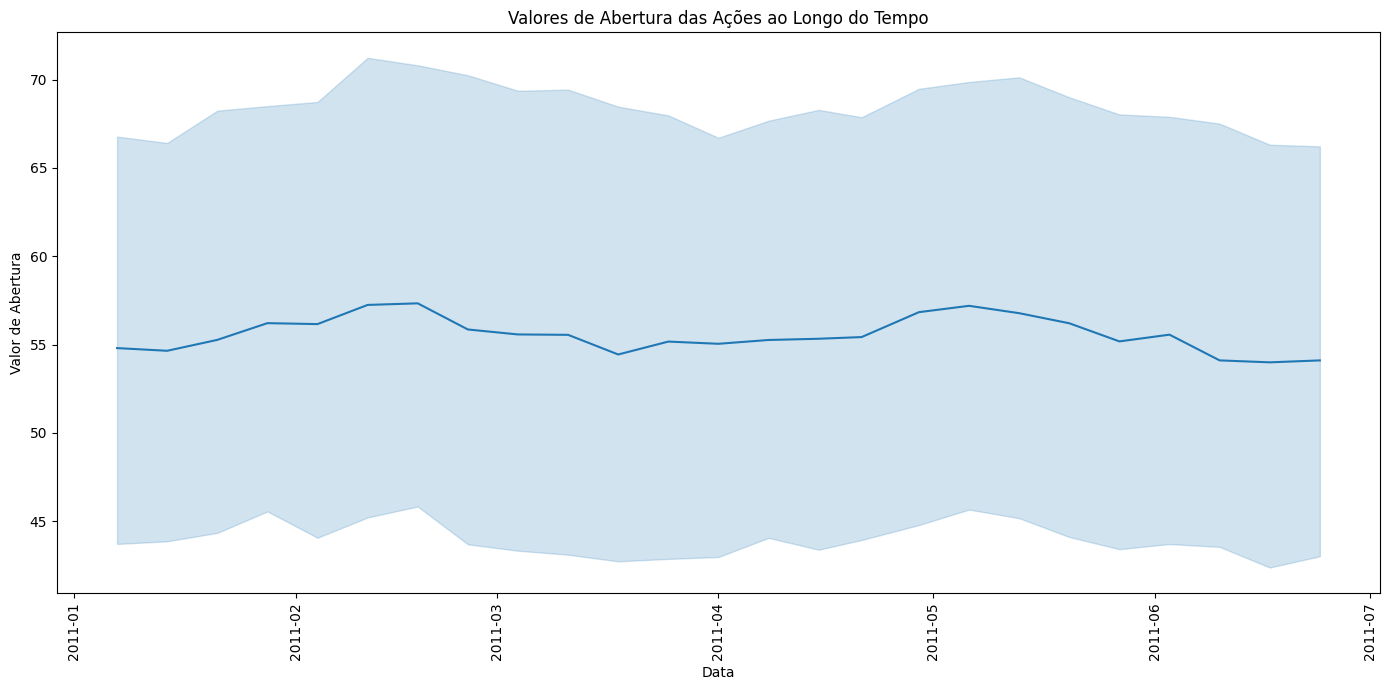

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dow_jones_index.data', header=None, skiprows=44, sep=',', on_bad_lines='skip')

print(df.head())


df.columns = ['col1', 'col2', 'date', 'col4', 'open', 'close', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16']

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['open'] = df['open'].str.replace('$', '', regex=False).astype(float)

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='open')
plt.xlabel('Data')
plt.ylabel('Valor de Abertura')
plt.title('Valores de Abertura das Ações ao Longo do Tempo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Vamos também visualizar o os valores de fechamento das ações ao longo do tempo.

   0    1          2       3       4       5       6          7        8   \
0   1  BAC  2/25/2011  $14.38  $14.52  $13.79  $14.20  712456757 -1.25174   
1   1  BAC   3/4/2011  $14.27  $14.48  $13.81  $14.12  699671790 -1.05116   
2   1  BAC  3/11/2011  $14.18  $14.70  $13.92  $14.38  805210688  1.41044   
3   1  BAC  3/18/2011  $14.26  $14.35  $13.66  $14.04  792380862 -1.54278   
4   1  BAC  3/25/2011  $14.20  $14.22  $13.32  $13.34  717678994 -6.05634   

          9            10      11      12        13  14        15  
0  55.414533  458423511.0  $14.27  $14.12 -1.051160   5  0.070422  
1  -1.794490  712456757.0  $14.18  $14.38  1.410440  89  0.070821  
2  15.084058  699671790.0  $14.26  $14.04 -1.542780  82  0.069541  
3  -1.593350  805210688.0  $14.20  $13.34 -6.056340  75  0.071225  
4  -9.427520  792380862.0  $13.42  $13.37 -0.372578  68  0.074963  


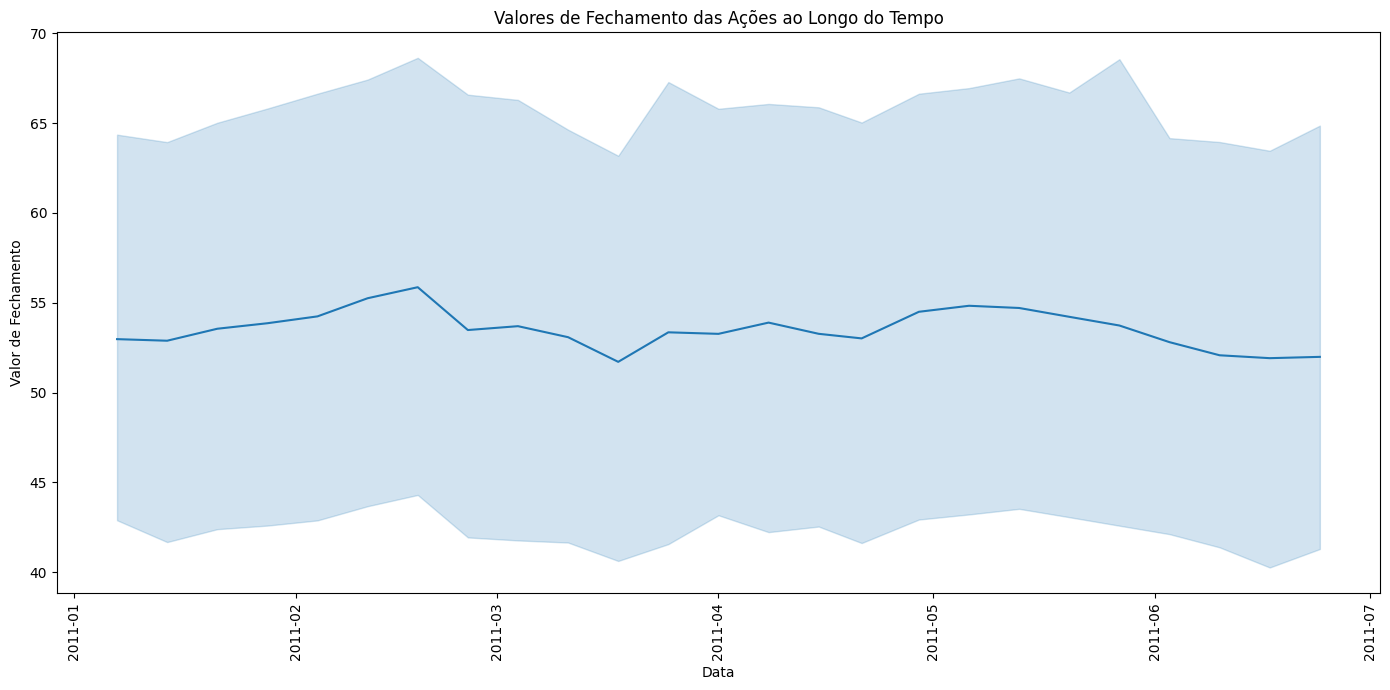

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dow_jones_index.data', header=None, skiprows=44, sep=',', on_bad_lines='skip')

print(df.head())

df.columns = ['col1', 'col2', 'date', 'col4', 'open', 'close', 'col7', 'col8', 
    'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16']

df['date'] = pd.to_datetime(df['date'], errors='coerce')


df['open'] = df['open'].str.replace('$', '', regex=False).astype(float)


df['close'] = df['close'].str.replace('$', '', regex=False).astype(float)

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='close')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento')
plt.title('Valores de Fechamento das Ações ao Longo do Tempo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Para facilitar a comparação, vamos visualizar os quatro valores no mesmo gráfico.

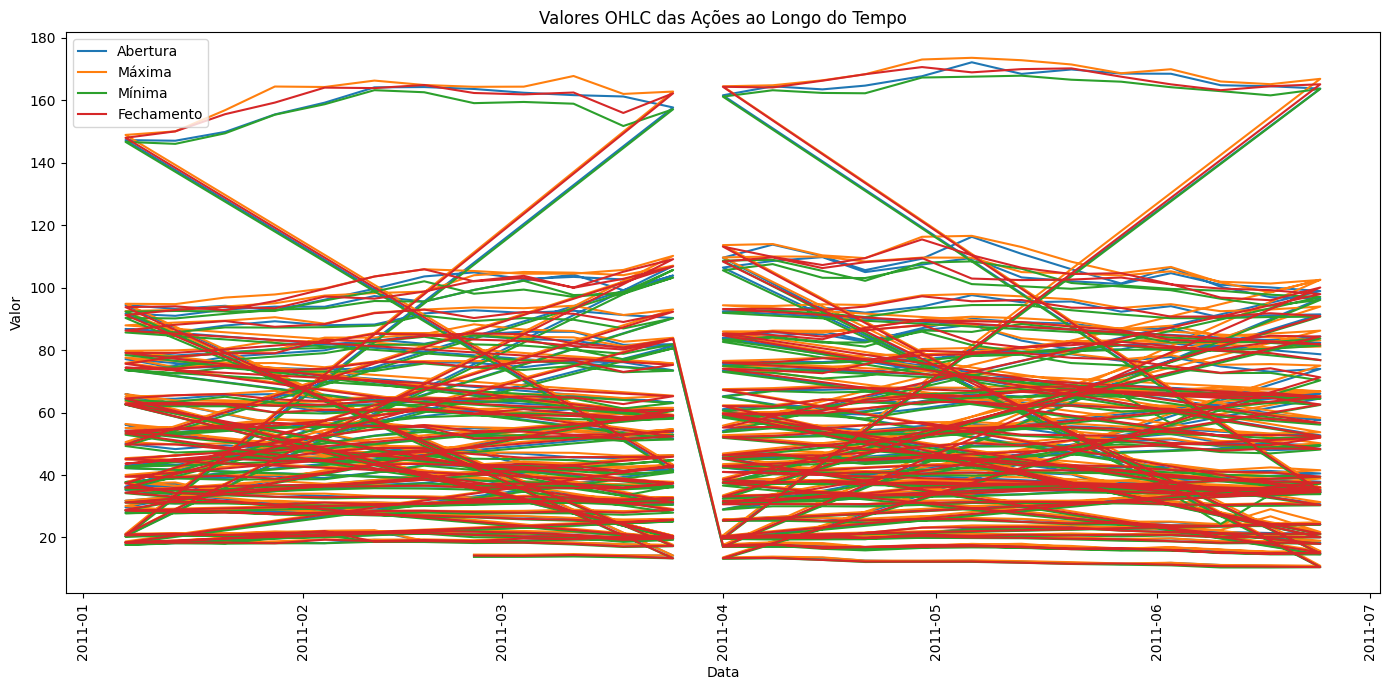

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo usando apenas as 8 primeiras colunas (ajuste se necessário)
# Assumindo que a estrutura é: índice, ticker, data, abertura, máxima, mínima, fechamento, volume
df = pd.read_csv('dow_jones_index.data', header=None, skiprows=44, sep=',',
    on_bad_lines='skip', usecols=range(8))

# Renomeia as colunas de forma que os nomes reflitam o conteúdo
df.columns = ['indice', 'ticker', 'date', 'open', 'high', 'low', 'close', 'volume']

# Converte a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Remove o cifrão das colunas de preço e converte para float
for col in ['open', 'high', 'low', 'close']:
    df[col] = df[col].str.replace('$', '', regex=False).astype(float)

# Plota os quatro valores (abertura, máxima, mínima e fechamento) no mesmo gráfico
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['open'], label='Abertura')
plt.plot(df['date'], df['high'], label='Máxima')
plt.plot(df['date'], df['low'], label='Mínima')
plt.plot(df['date'], df['close'], label='Fechamento')

plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Valores OHLC das Ações ao Longo do Tempo')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Para finalizar, vamos salvar o gráfico numa figura.

Colunas do DataFrame: Index(['Rank', 'Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Change', 'Col9', 'Col10', 'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjClose',
       'Col15'],
      dtype='object')


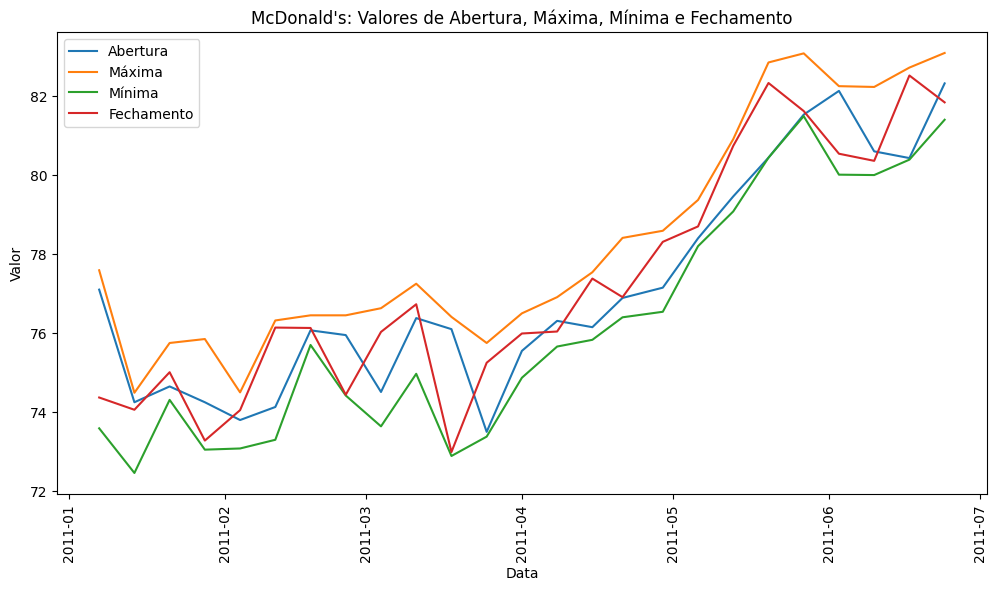

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

column_names = [
    "Rank", "Ticker", "Date", "Open", "High", "Low", "Close", 
    "Volume", "Change", "Col9", "Col10", "AdjOpen", "AdjHigh", "AdjLow", "AdjClose", "Col15"
]

df = pd.read_csv('dow_jones_index.data', header=None, names=column_names, sep=',', on_bad_lines='skip')

print("Colunas do DataFrame:", df.columns)

df_mcd = df[df["Ticker"] == "MCD"]

if df_mcd.empty:
    print("Nenhum dado para McDonald's (MCD) foi encontrado no arquivo.")
else:
    df_mcd.loc[:, 'Date'] = pd.to_datetime(df_mcd['Date'])

    for col in ['Open', 'High', 'Low', 'Close']:
        df_mcd.loc[:, col] = df_mcd[col].replace({r'\$': ''}, regex=True).astype(float)

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_mcd, x='Date', y='Open', label='Abertura')
    sns.lineplot(data=df_mcd, x='Date', y='High', label='Máxima')
    sns.lineplot(data=df_mcd, x='Date', y='Low', label='Mínima')
    sns.lineplot(data=df_mcd, x='Date', y='Close', label='Fechamento')

    plt.xticks(rotation=90)
    plt.title("McDonald's: Valores de Abertura, Máxima, Mínima e Fechamento")
    plt.xlabel("Data")
    plt.ylabel("Valor")
    plt.legend()

    plt.savefig("MCD.png", dpi=300)
    plt.show()


**Agora é a sua vez,** faça o gráfico acima para a empresa Coca-Cola e salve a imagem com o nome `ko.png`.

Colunas do DataFrame: Index(['Rank', 'Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Change', 'Col9', 'Col10', 'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjClose',
       'Col15'],
      dtype='object')


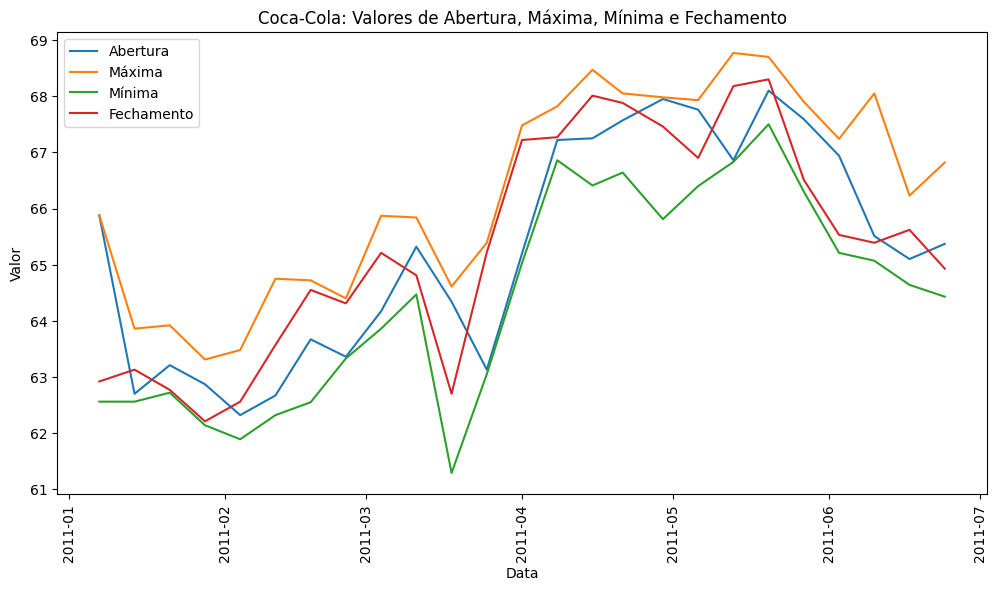

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define os nomes das colunas manualmente, conforme a estrutura dos dados fornecidos
column_names = [
    "Rank", "Ticker", "Date", "Open", "High", "Low", "Close", 
    "Volume", "Change", "Col9", "Col10", "AdjOpen", "AdjHigh", "AdjLow", "AdjClose", "Col15"
]

# Leia o arquivo. Ajuste 'skiprows' se necessário (aqui usamos 0, supondo que o arquivo já está limpo)
df = pd.read_csv('dow_jones_index.data', header=None, names=column_names, sep=',', on_bad_lines='skip')

print("Colunas do DataFrame:", df.columns)

# Filtra os dados para a Coca-Cola (ticker "KO")
df_ko = df[df["Ticker"] == "KO"]

if df_ko.empty:
    print("Nenhum dado para a Coca-Cola (KO) foi encontrado no arquivo.")
else:
    # Converte a coluna 'Date' para datetime (usamos .loc para evitar warnings)
    df_ko.loc[:, 'Date'] = pd.to_datetime(df_ko['Date'])

    # Remove o cifrão e converte as colunas de preços para float
    for col in ['Open', 'High', 'Low', 'Close']:
        # Use raw string para evitar warnings de escape
        df_ko.loc[:, col] = df_ko[col].replace({r'\$': ''}, regex=True).astype(float)

    # Plotagem dos quatro valores no mesmo gráfico
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_ko, x='Date', y='Open', label='Abertura')
    sns.lineplot(data=df_ko, x='Date', y='High', label='Máxima')
    sns.lineplot(data=df_ko, x='Date', y='Low', label='Mínima')
    sns.lineplot(data=df_ko, x='Date', y='Close', label='Fechamento')

    plt.xticks(rotation=90)
    plt.title("Coca-Cola: Valores de Abertura, Máxima, Mínima e Fechamento")
    plt.xlabel("Data")
    plt.ylabel("Valor")
    plt.legend()

    # Salva o gráfico com o nome "KO.png" (ticker em maiúsculo) com resolução de 300 dpi
    plt.savefig("coca-cola.png", dpi=300)
    plt.show()


Analise as duas imagens e escreva pelo menos um *insight* que você consegue extrair dos dados. Fique a vontade para escrever quantos *insights* você quiser.

**Insight #1**: Estabilidade vs. Dinamismo:

Coca-Cola (KO): O gráfico da Coca-Cola tende a mostrar uma trajetória mais estável, com variações moderadas nos preços. Essa estabilidade pode indicar que os investidores veem a empresa como uma opção de “porto seguro” em momentos de incerteza, típica de empresas do setor de consumo não-cíclico.
McDonald's (MCD): Em contraste, o gráfico do McDonald's revela uma leve tendência de alta, com oscilações que parecem refletir um comportamento um pouco mais dinâmico. Isso pode sugerir que o mercado responde positivamente às estratégias e inovações da empresa, resultando em uma trajetória de crescimento mais consistente.

**Insight #2** Resiliência e Confiança dos Investidores:

Apesar das flutuações, ambos os gráficos indicam uma recuperação após eventuais quedas pontuais, evidenciando resiliência. No caso do McDonald's, a recuperação associada à tendência de alta pode ser interpretada como um sinal de confiança dos investidores na capacidade da empresa de se adaptar e crescer mesmo em períodos desafiadores.

**Insight #3** Comparativo Setorial:

Enquanto a Coca-Cola, tradicionalmente considerada uma ação defensiva, mostra uma estabilidade que reforça sua posição como uma opção segura em tempos de volatilidade, o McDonald's demonstra um equilíbrio entre estabilidade e crescimento, evidenciando seu potencial de valorização associado a um setor que também é resiliente, mas com maior dinamismo.
